In [50]:
#just checking the versions
import sys
print("Python Version",format(sys.version))
import scipy
print('scipy Version',format(scipy.__version__))
# numpy
import numpy
print('numpy Version',format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib Version',format(matplotlib.__version__))
# pandas
import pandas
print('pandas Version',format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn Version',format(sklearn.__version__))

Python Version 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
scipy Version 1.4.1
numpy Version 1.18.1
matplotlib Version 3.1.3
pandas Version 1.0.1
sklearn Version 0.22.1


In [51]:
#import all of the modules, functions and objects
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
- We can load the data directly from the UCI Machine Learning repository
- We are using pandas to load the data. 
- We will also use pandas next to explore the data both with descriptive statistics and data visualization

In [52]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = read_csv('iris.csv', names = names)

# Summarise the Dataset
- Dimensions of the dataset.
- Peek at the data itself.
- Statistical summary of all attributes.
- Breakdown of the data by the class variable.

In [53]:
# Dimensions of the dataset.
data.shape

(150, 5)

In [54]:
# Peek at the data itself.
data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [55]:
# Statistical summary of all attributes

data.describe()

# in the  o/p, We can see that all of the numerical values have the same scale (centimeters) and 
#similar ranges between 0 and 8 centimeters.

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [56]:
# Breakdown of the data by the class variable. or Class Distribution

# take a look at the number of instances (rows) that belong to each class. 
# We can view this as an absolute count

data.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Data Visualization
- Univariate plots to better understand each attribute.
- Multivariate plots to better understand the relationships between attributes

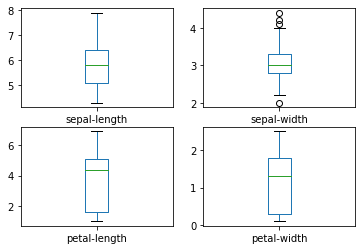

In [57]:
# Univariate plots to better understand each attribute.
# plots of each individual variable
# Given that the input variables are numeric, we can create box and whisker plots of each

data.plot( kind = 'box', subplots = True, layout = (2,2), sharex = False, sharey = False)
plt.show()

In [58]:
#from the box plot, we can see there is outliers in the "sepal-width" 
# so inorder to remove the outliers....
a = data['sepal-width']

In [59]:
removed_outlierz = a.between(a.quantile(0.05),a.quantile(0.95))

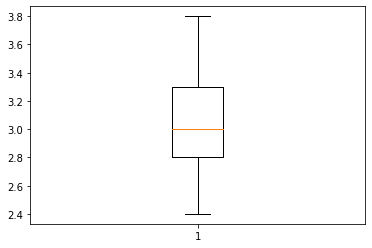

In [60]:
plt.boxplot(a[removed_outlierz]);

Text(0.5, 1.0, 'outlierz removed')

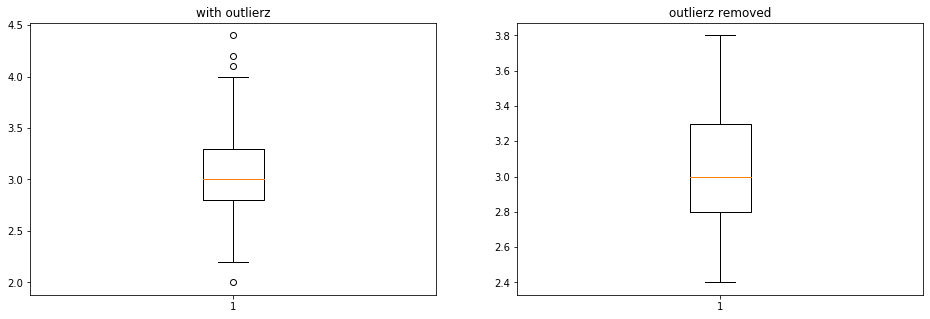

In [61]:
#after removing the outliez comparing the "before" and "after" boxplots
figure, ax = plt.subplots(1,2, figsize =(16,5))
ax[0].boxplot(a)
ax[1].boxplot(a[removed_outlierz])

ax[0].set_title("with outlierz")
ax[1].set_title("outlierz removed")

In [62]:
#now that we have removed the outlierz, bring that changes into the current dataset by creating a new column 'new_sepal-width'
data['new_sepal-width'] = a[removed_outlierz]


In [63]:
data.head(2)
#as you can see a new colum will be added.

,sepal-length,sepal-width,petal-length,petal-width,class,new_sepal-width
0,5.1,3.5,1.4,0.2,Iris-setosa,3.5
1,4.9,3.0,1.4,0.2,Iris-setosa,3.0


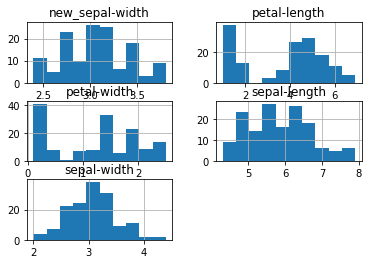

In [64]:
#create a histogram of each input variable to get an idea of the distribution
data.hist()
plt.show()
#This is useful to note as we can use algorithms that can exploit this assumption.

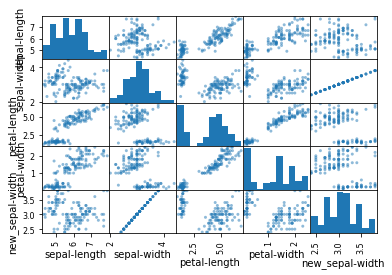

In [65]:
#Multivariate Plots
#Multivariate plots to better understand the relationships between attributes
#ie, we can look at the interactions between the variables.
#First, let’s look at scatterplots of all pairs of attributes. 
#This can be helpful to spot structured relationships between input variables.

#scatter plot matrix
scatter_matrix(data)
plt.show()
#in the o/p the diagonal grouping of some pairs of attributes. 
#This suggests a high correlation and a predictable relationship.


## Evaluate Some Algorithms
ie to create some models of the data and estimate their accuracy on unseen data
- 1) Separate out a validation dataset.(splitting the data into train and test)
- 2) Build multiple different models to predict species from flower measurements
- 3) Set-up the test harness to use 10-fold cross validation.(eg: k-fold =5, and taking the avg accuracy)
- 4) Select the best model.

## 1) Separate out a validation(test) dataset.(splitting the data into train and test)

In [66]:
#define X and y
#X = data.ilioc[:,:-1]
#y = data.class
#or we can use the python slice to select the columns in the NumPy array
array = data.values
X = array[:,0:4]
y = array[:,4]

In [67]:
#split the loaded dataset into two, 80% of which we will use to train, evaluate and select among our models, 
#and 20% that we will hold back as a validation(test) dataset.

#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)
X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size = 0.2,random_state = 1)

#we now have training data in the X_train and Y_train for preparing models 
#and a X_validation and Y_validation sets that we can use later to predict the accuracy.

## 2) Build multiple different models to predict species from flower measurements
- which algorithms is best suited for the iris dataset.


Let’s test with different algorithms:

- Logistic Regression (LR)
- Linear Discriminant Analysis (LDA)
- K-Nearest Neighbors (KNN).
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM).
- RandomForestClassifier (RF).

In [68]:
# The reason for taking all these algorithms is 
# to get a good mixture of simple linear (LR and LDA), nonlinear (KNN, CART, NB and SVM) algorithms.

models = []
models.append(('1)LR',LogisticRegression()))
models.append(('2)LDA',LinearDiscriminantAnalysis()))
models.append(('3)KNN',KNeighborsClassifier()))
models.append(('4)CART',DecisionTreeClassifier()))
models.append(('5)NB',GaussianNB()))
models.append(('6)SVM', SVC()))
models.append(('7)RF',RandomForestClassifier()))
#note: not any of the above algorithms are fine tuned(can do that of course)
#my intentiion is to run multiple algorithms on a single dataset and compare the accuracy obtained. )


## 3) Set-up the test harness to use 10-fold cross validation.
- Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.
- "k" refers to the number of groups that a given data sample is to be split into, hence the name "kfold"
- ie, k=10 becoming 10-fold cross-validation

In [69]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring = 'accuracy')
    results.append(cv_results)
    names.append(names)
    print(('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())))
#literally we are just trying to findout the best model (with the best accuracy)
# and then we'll use the same model with the test data, hence we get the best predictions.

1)LR: 0.966667 (0.040825)
2)LDA: 0.975000 (0.038188)
3)KNN: 0.958333 (0.041667)
4)CART: 0.950000 (0.055277)
5)NB: 0.950000 (0.055277)
6)SVM: 0.966667 (0.040825)
7)RF: 0.950000 (0.040825)


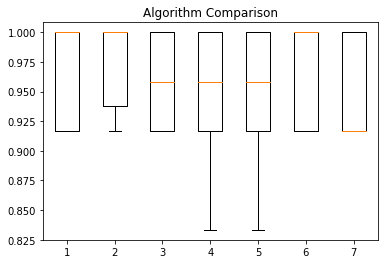

In [70]:
#select the Best Model by creating a box and whisker plot for each distribution and compare the distributions.

plt.boxplot(results)
plt.title('Algorithm Comparison')
plt.show()
#We can see that the box and whisker plots are squashed at the top of the range, 
#with many evaluations achieving 100% accuracy, and some pushing down into the high 80% accuracies

## Training and Prediction

In [71]:
#choose a model to make the prediction, 
#It is valuable to keep a validation(test) set just in case you made a slip during training, 
#such as overfitting to the training set or a data leak. Both of these issues will result in an overly optimistic result.
model = LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_validation)

In [72]:
#evaluate prediction

print(accuracy_score(y_validation,y_predict))
print(confusion_matrix(y_validation,y_predict))
print(classification_report(y_validation,y_predict))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

